In [2]:
!pip install vamp

     |████████████████████████████████| 112kB 458kB/s eta 0:00:01
  Created wheel for vamp: filename=vamp-1.1.0-cp37-cp37m-linux_x86_64.whl size=1485690 sha256=034eae4d08eafc50acf812c22b164db0da88275e36d1b3259d54b6f2b8bdccc8
  Stored in directory: /home/changgeonlee/.cache/pip/wheels/b5/cc/b8/374e575c2ca0ec9f265cf1d7b4855ee8622800ea3fe25ea4a1
Successfully built vamp


In [52]:
import vamp
import librosa
# import essentia.standard as es
import matplotlib.pyplot as plt
%matplotlib inline


In [86]:
audio_file = '/home/changgeonlee/Project/DeepMusic/data/삐삐_IU/1'

In [87]:
# loader = es.MonoLoader(filename=audio_file, downmix = 'mix', sampleRate = 44100)
# audio = loader()

In [88]:
audio, sr = librosa.load(audio_file, sr=44100, mono=True)

In [115]:
audio.shape

(9187823,)

In [116]:
data = vamp.collect(audio, sr, "mtg-melodia:melodia")

In [117]:
data

{'vector': ( 0.002902494, array([0., 0., 0., ..., 0., 0., 0.], dtype=float32))}

In [118]:
hop, melody = data['vector']
print(hop)
print(melody)
print(melody.shape)

 0.002902494
[0. 0. 0. ... 0. 0. 0.]
(71780,)


In [93]:
import numpy as np
timestamps = 8 * 128/44100.0 + np.arange(len(melody)) * (128/44100.0)

/home/changgeonlee/.pyenv/versions/3.7.1/envs/sound/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log2
  after removing the cwd from sys.path.
/home/changgeonlee/.pyenv/versions/3.7.1/envs/sound/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log2
  after removing the cwd from sys.path.


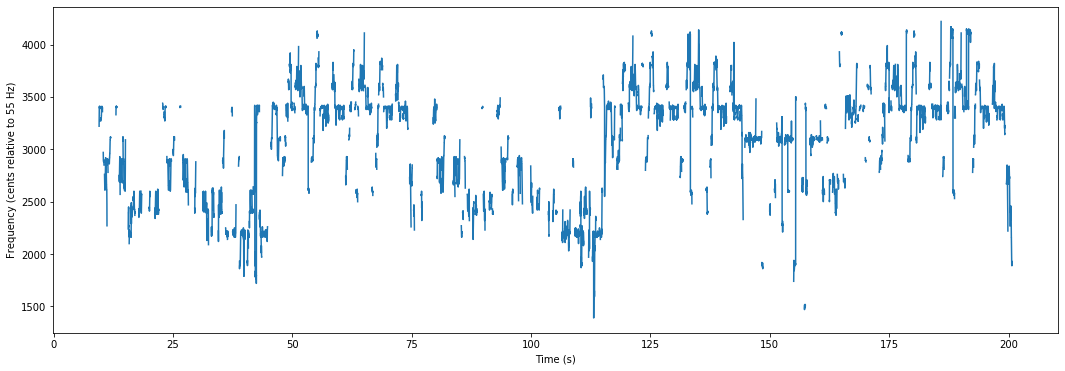

In [110]:
# Finally, you might want to plot the pitch sequence in cents rather than in Hz. 
# This especially makes sense if you are comparing two or more pitch sequences 
# to each other (e.g. comparing an estimate against a reference).
melody_cents = 1200*np.log2(melody/55.0)
melody_cents[melody<=0] = None
plt.figure(figsize=(18,6))
plt.plot(timestamps, melody_cents)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (cents relative to 55 Hz)')
plt.show()

In [112]:
from scipy.io.wavfile import write

# scaled = melody_cents/np.max(np.abs(melody_cents)) * 32767
scaled = np.int16(melody_cents/np.max(np.abs(melody_cents)) * 32767)
write('test.wav', 44100, scaled)

In [74]:
print(scaled)

[0. 0. 0. ... 0. 0. 0.]


In [109]:
scaled[70000]

-11451.82

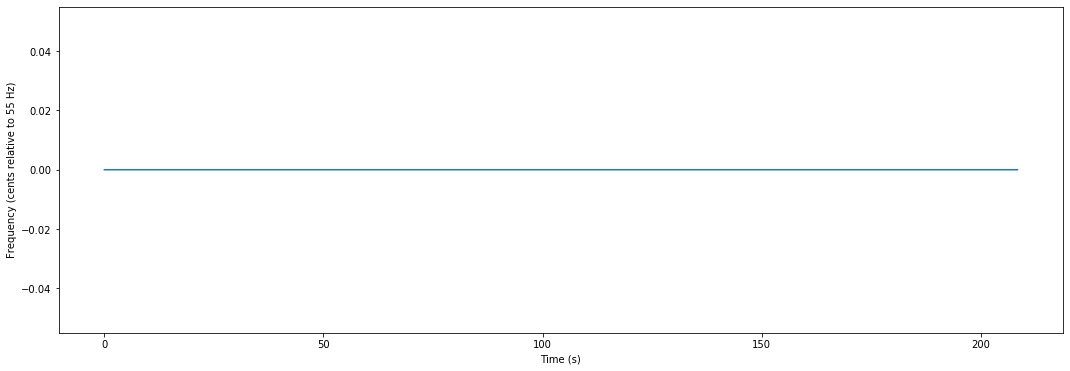

In [123]:
plt.figure(figsize=(18,6))
plt.plot(timestamps, scaled)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (cents relative to 55 Hz)')
plt.show()